# DBSCAN кластеризация
В качестве примера будет использован датасет домов

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## Описание полей:
- date - дата продажи
- price - цена
- bedrooms - количество спален
- bathrooms - количество ванных
- sqft_living - жилая площадь
- sqft_lot - наверно не жилая
- floors - количество этажей
- waterfront - набережная??

...

    

In [2]:
df.drop(["date", "id", "zipcode", "condition", "lat", "long"], axis=1, inplace=True)
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

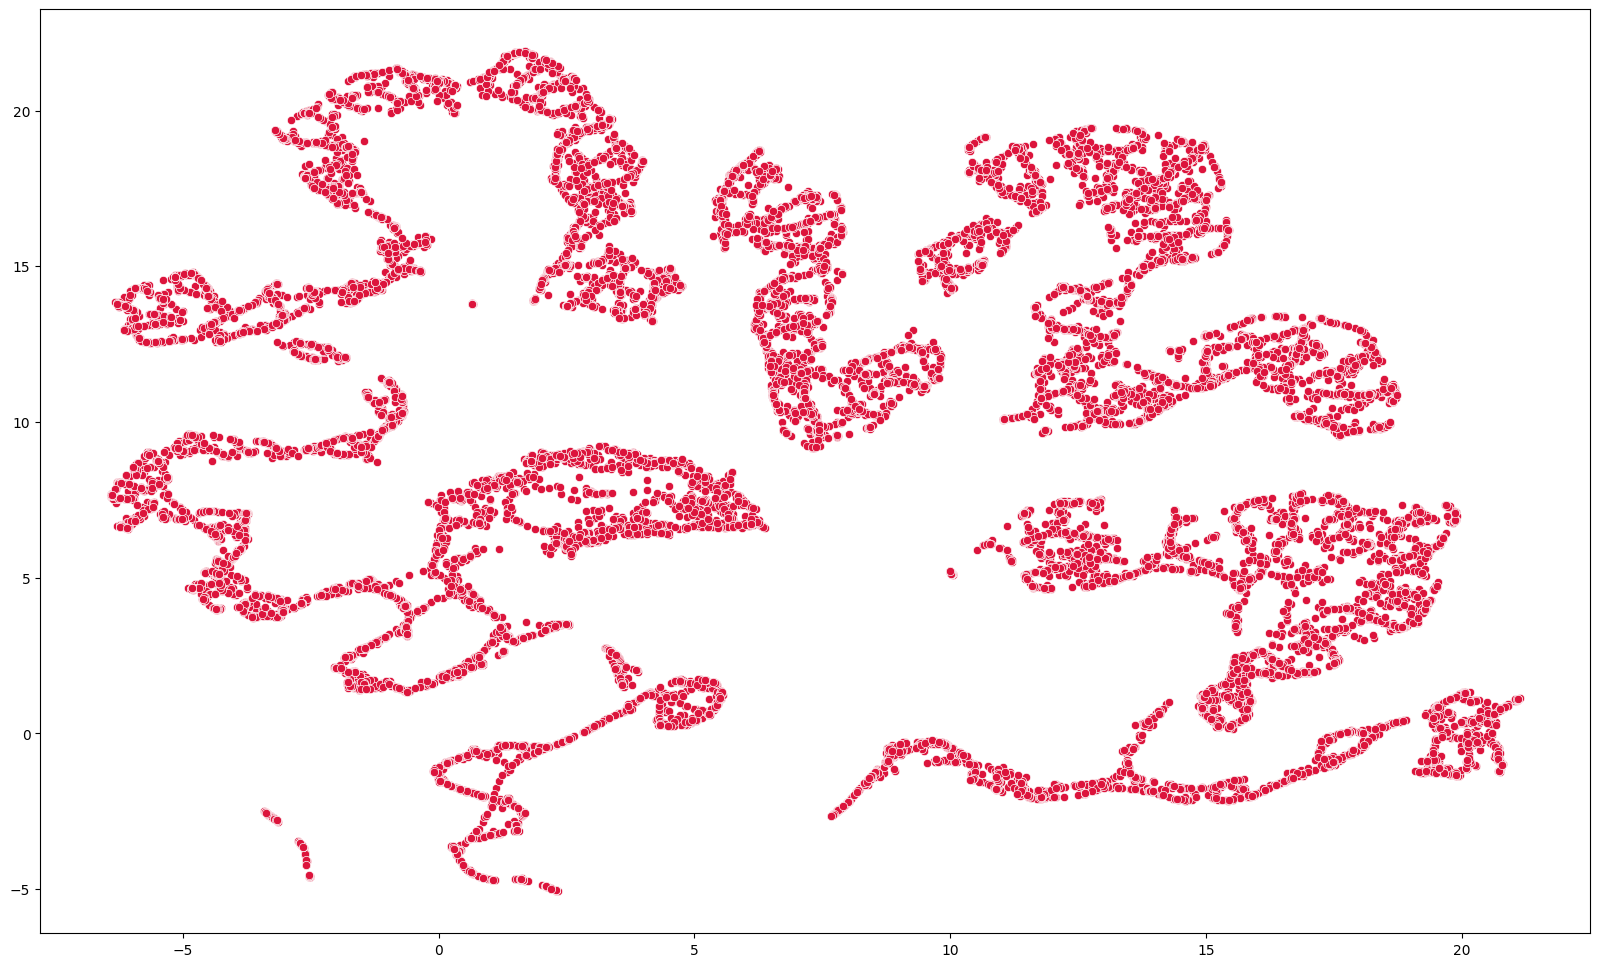

In [3]:
from umap import UMAP

umap = UMAP(random_state=42)
df_transformed = umap.fit_transform(df)

plt.figure(figsize=(20,12))
sns.scatterplot(x=df_transformed[:,0], y=df_transformed[:,1], color="crimson")
plt.show()

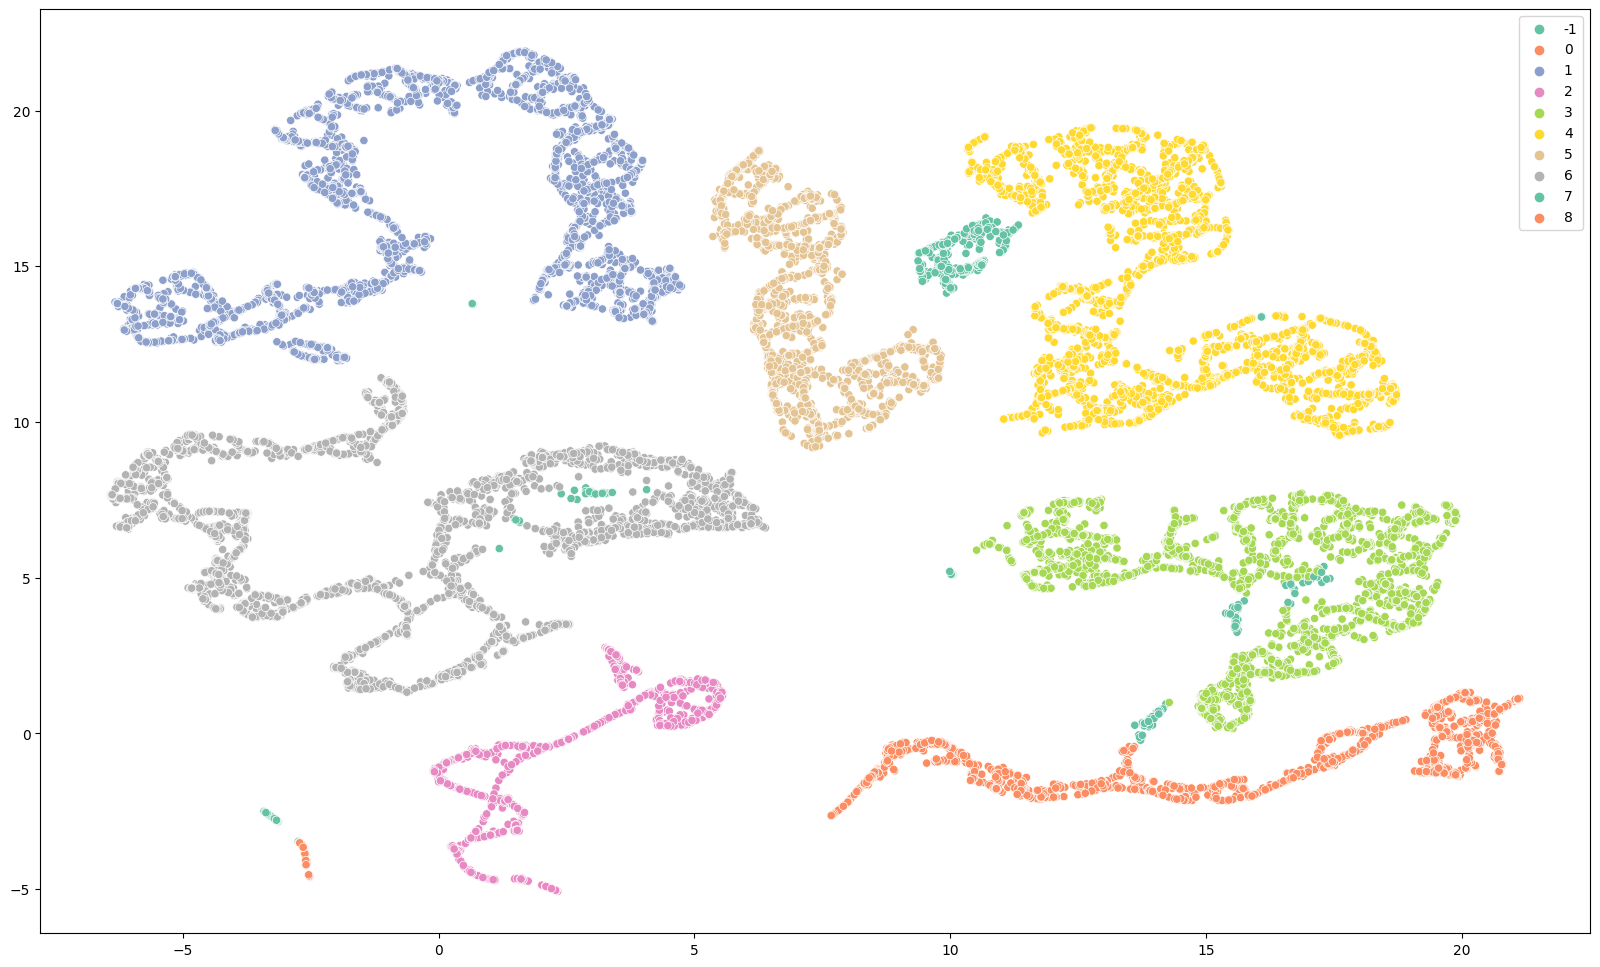

In [7]:
from sklearn.cluster import DBSCAN


dbscan = DBSCAN(eps=0.6, min_samples=55).fit(df_transformed)

plt.figure(figsize=(20,12))
sns.scatterplot(x=df_transformed[:,0], y=df_transformed[:,1], hue=dbscan.labels_, palette="Set2")
plt.show()